In [1]:
from grad_analysis import GradAnalysis
import numpy as onp
import jax.numpy as jnp


def simple_poly(x: float) -> float:
    return 4 - 3 * x + 2 * x**2

/Users/augustfemtehjell/opt/miniconda3/envs/fysstk/lib/python3.11/site-packages/jax/_src/api_util.py:172: SyntaxWarning: Jitted function has static_argnums=(1,), but only accepts 1 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


In [2]:
onp.random.seed(2023)
n_points = 100
x = onp.random.randn(n_points)
y = simple_poly(x) + onp.random.randn(n_points)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
true_theta = jnp.array([4, -3, 2]).reshape(-1, 1)
n_epochs = 500

I0000 00:00:1699739493.661607       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [3]:
from CostFuncs import regressionOLS

GA = GradAnalysis(
    x,
    y,
    n_epochs=n_epochs,
    seed=2023,
    cost_func=regressionOLS,
    true_theta=true_theta,
    target_func=simple_poly,
)

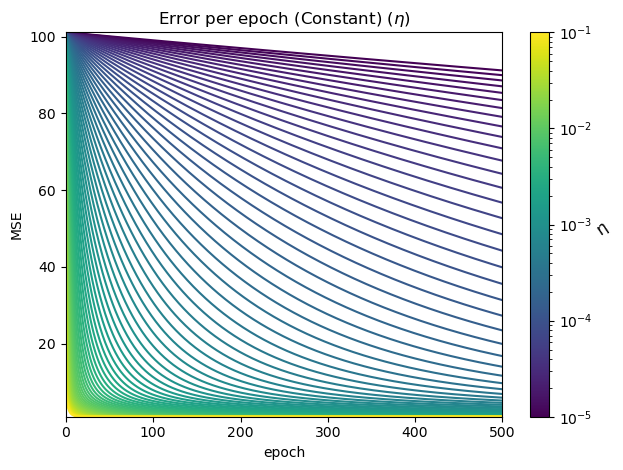

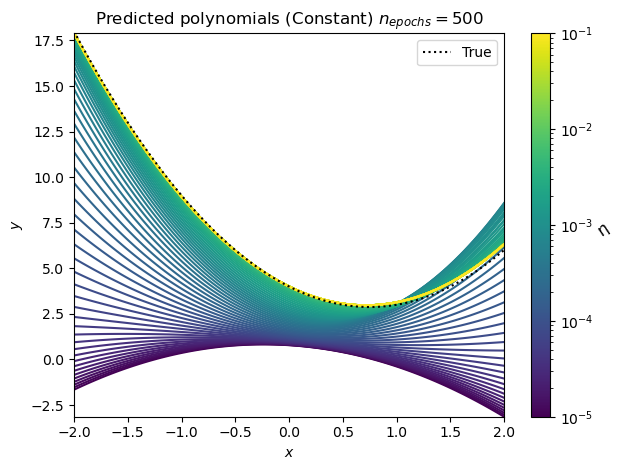

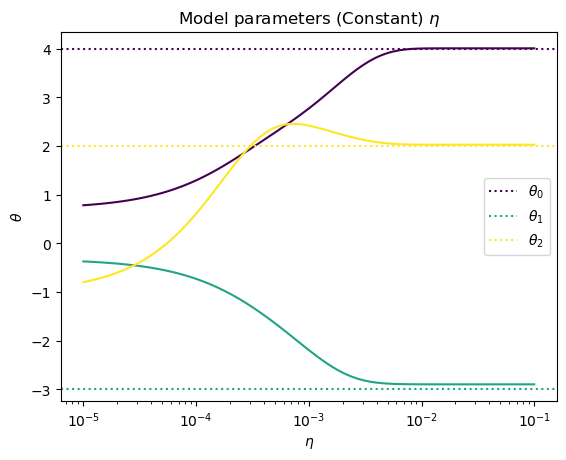

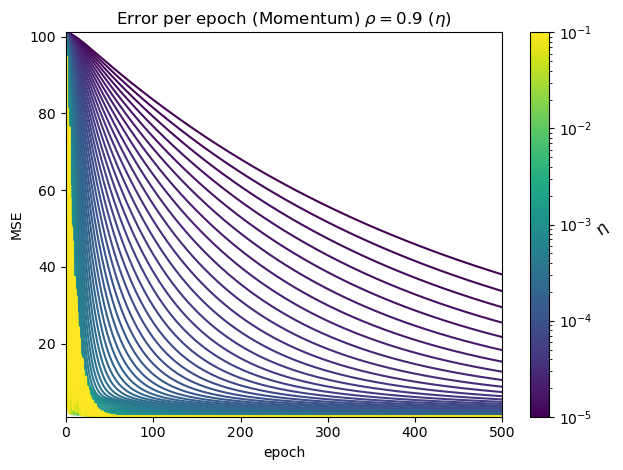

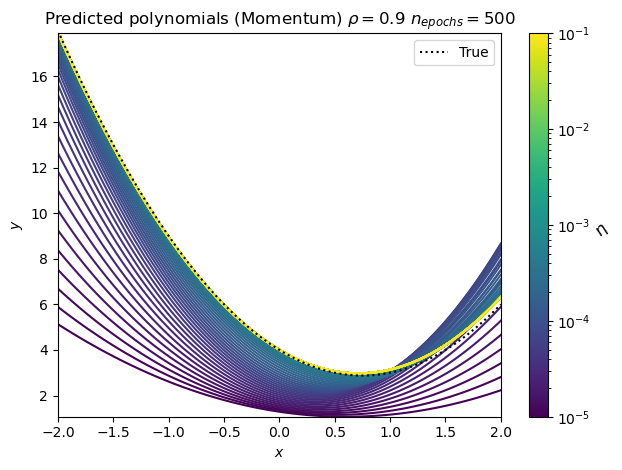

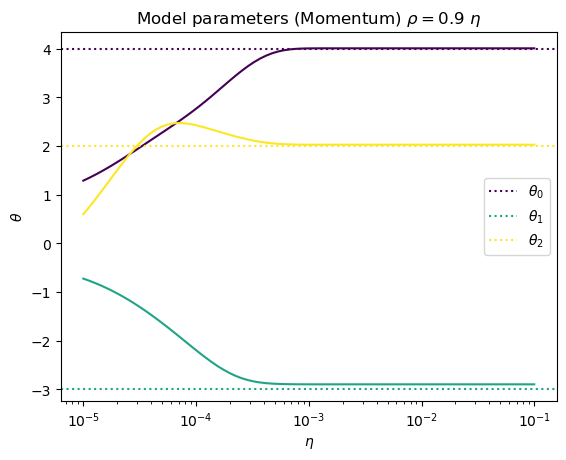

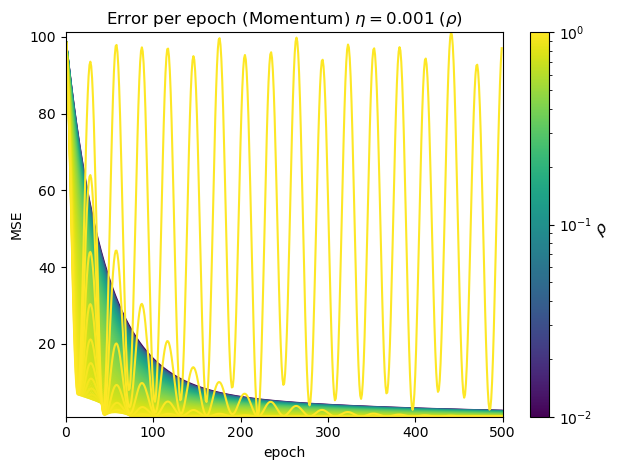

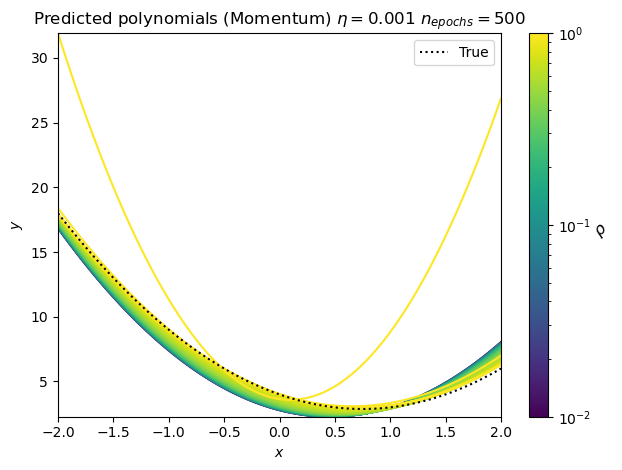

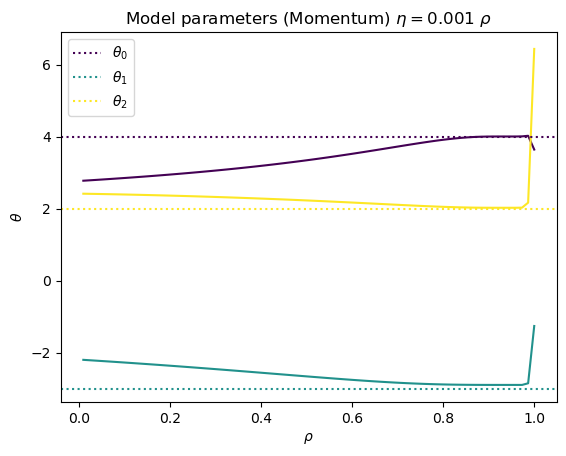

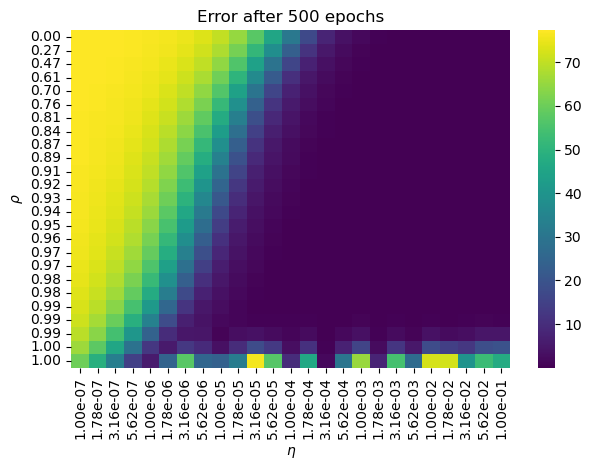

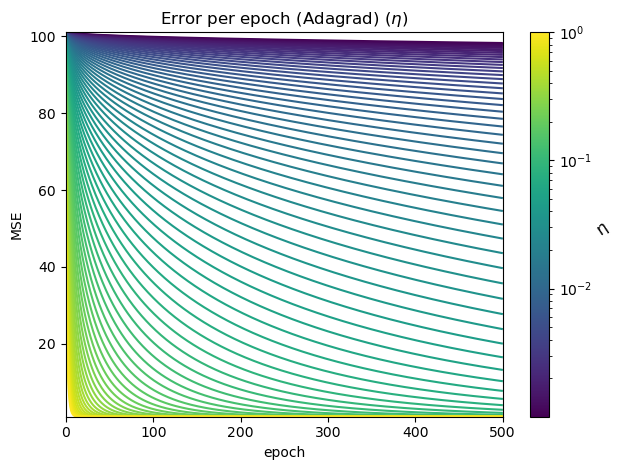

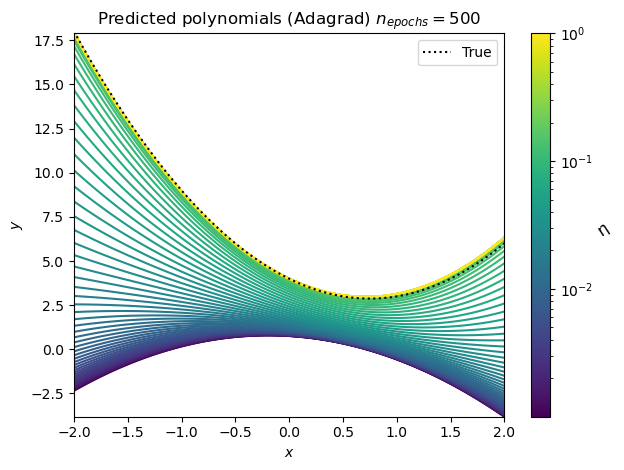

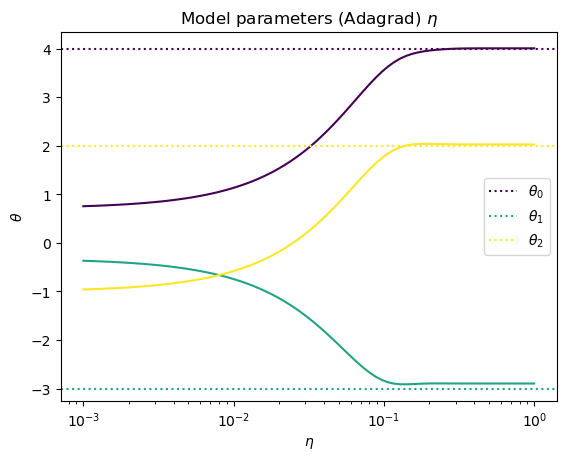

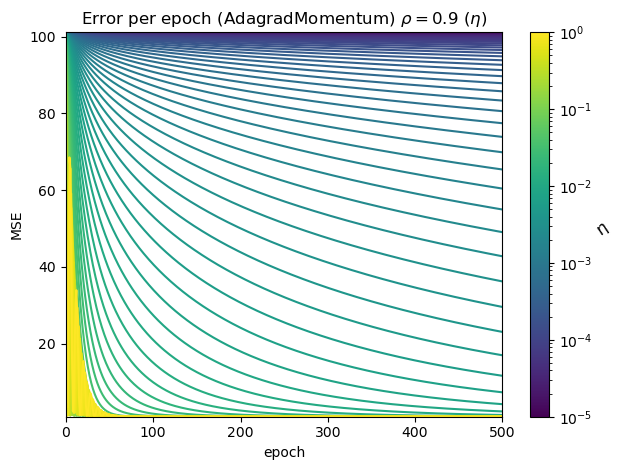

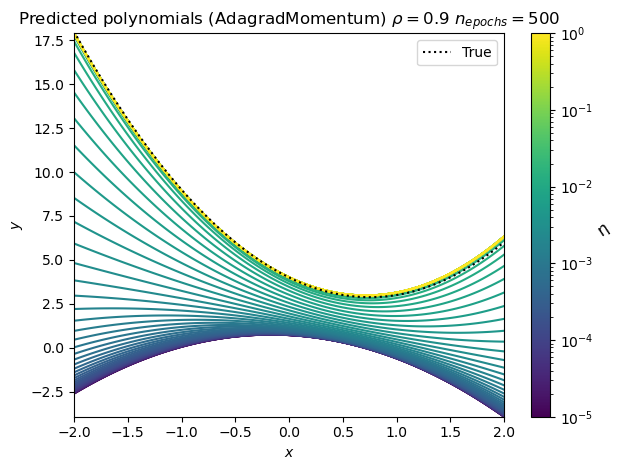

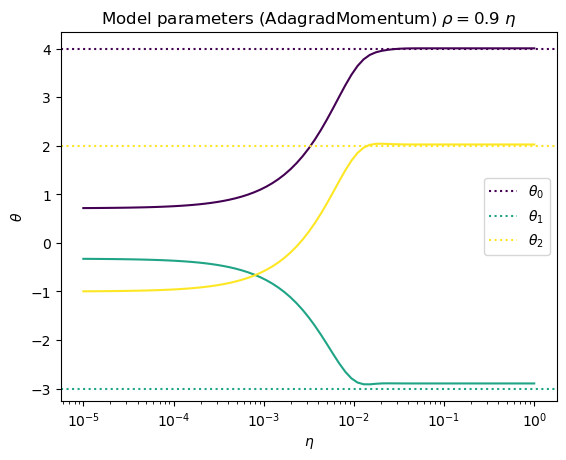

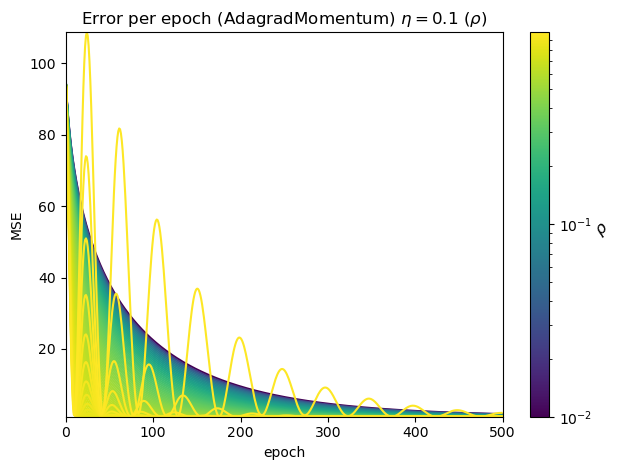

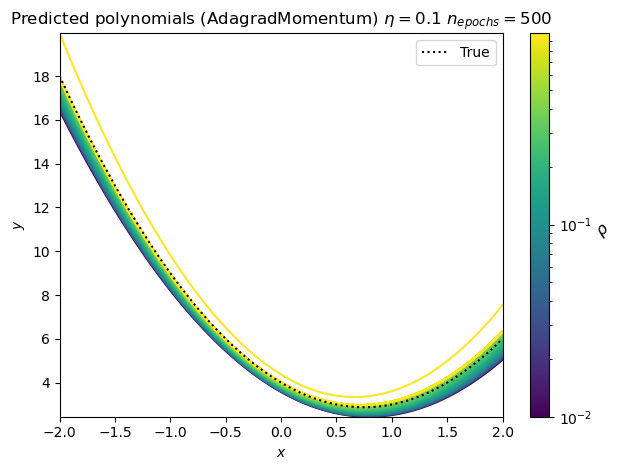

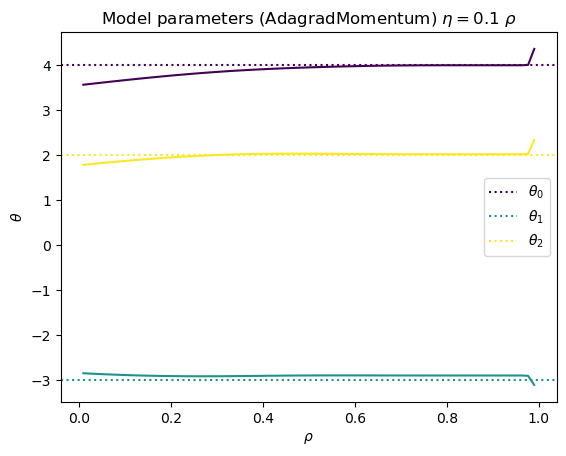

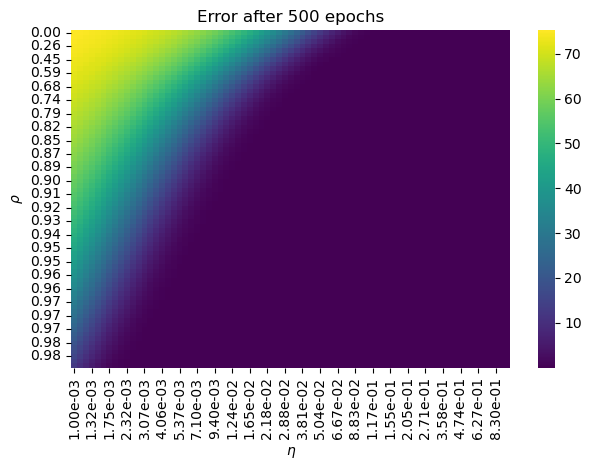

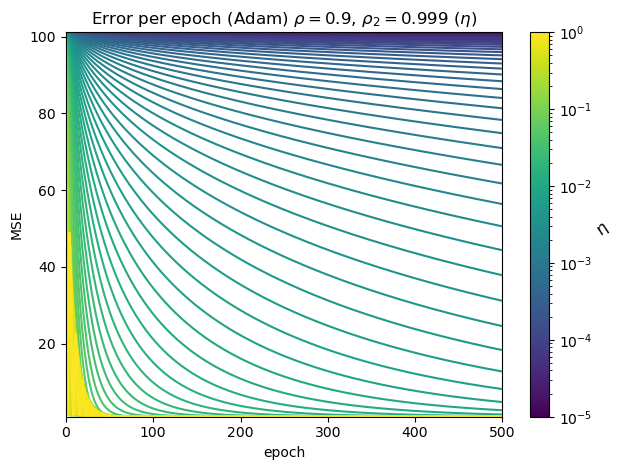

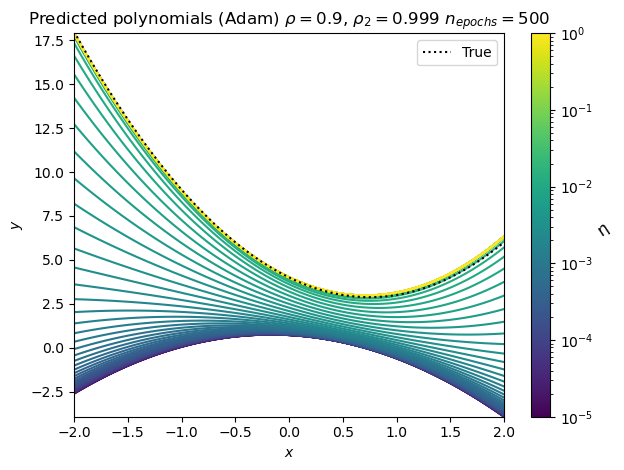

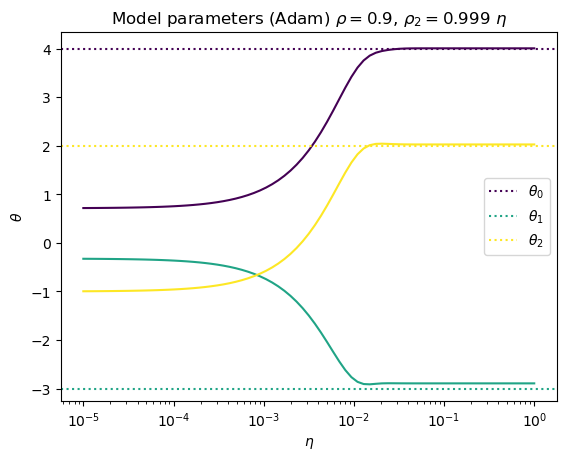

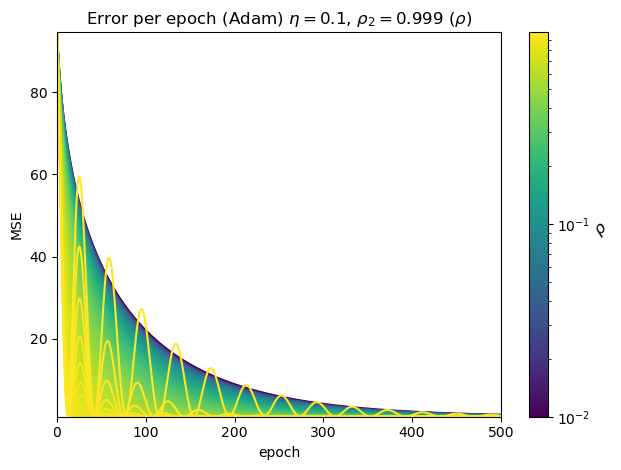

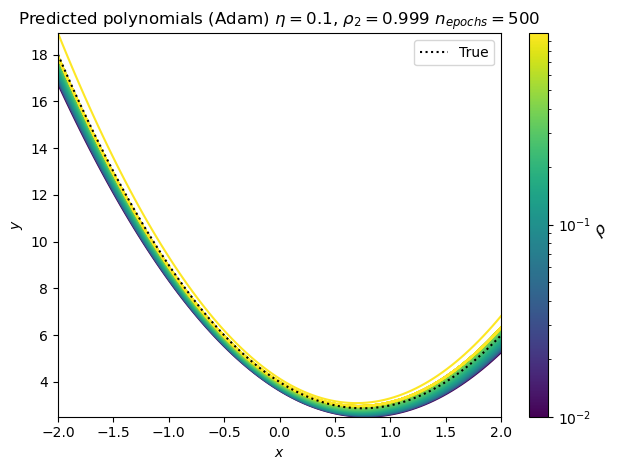

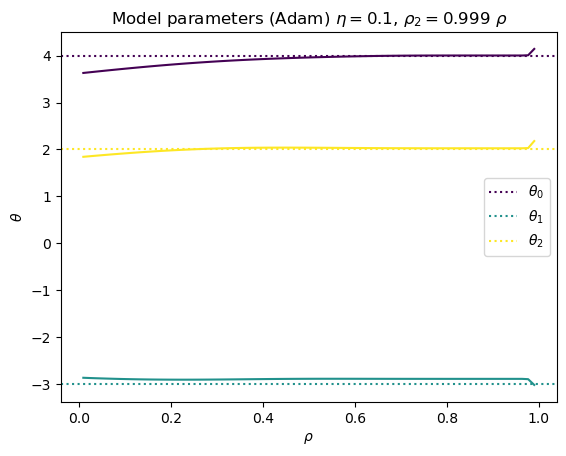

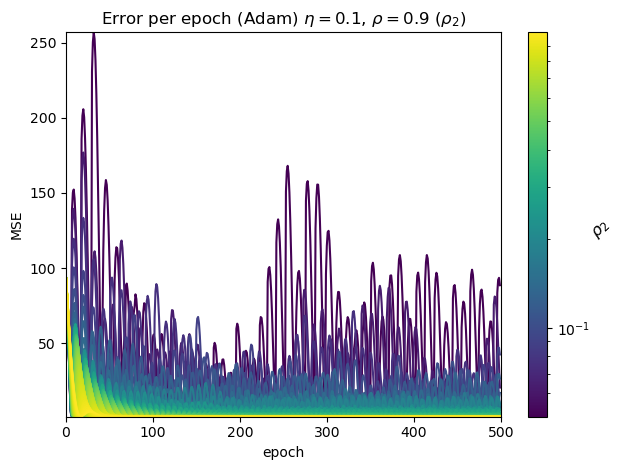

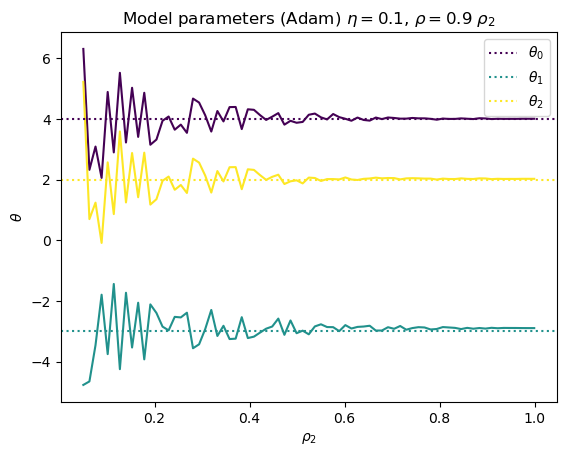

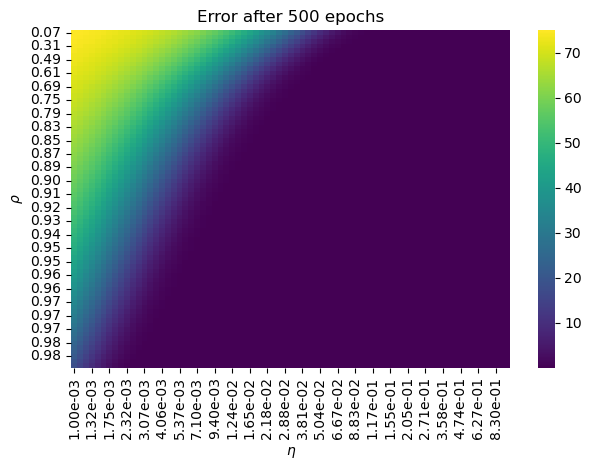

ValueError: Cannot lower jaxpr with verifier errors: #loc1 = loc("rho")
#loc2 = loc("second")
#loc3 = loc("gradient")
"builtin.module"() <{sym_name = "jit_fast_rms_second"}> ({
  "func.func"() <{arg_attrs = [{mhlo.sharding = "{replicated}"}, {mhlo.sharding = "{replicated}"}, {mhlo.sharding = "{replicated}"}], function_type = (tensor<f32>, tensor<f32>, tensor<3x1xf32>) -> tensor<3x1xf32>, res_attrs = [{jax.result_info = ""}], sym_name = "main", sym_visibility = "public"}> ({
  ^bb0(%arg0: tensor<f32> loc("rho"), %arg1: tensor<f32> loc("second"), %arg2: tensor<3x1xf32> loc("gradient")):
    %0 = "stablehlo.multiply"(%arg0, %arg1) : (tensor<f32>, tensor<f32>) -> tensor<f32> loc(#loc9)
    %1 = "stablehlo.constant"() {value = dense<1> : tensor<i32>} : () -> tensor<i32> loc(#loc)
    %2 = "stablehlo.subtract"(%1, %arg0) : (tensor<i32>, tensor<f32>) -> tensor<i32> loc(#loc10)
    %3 = "stablehlo.multiply"(%arg2, %arg2) : (tensor<3x1xf32>, tensor<3x1xf32>) -> tensor<3x1xf32> loc(#loc11)
    %4 = "stablehlo.broadcast_in_dim"(%2) {broadcast_dimensions = dense<> : tensor<0xi64>} : (tensor<i32>) -> tensor<3x1xi32> loc(#loc12)
    %5 = "stablehlo.multiply"(%4, %3) : (tensor<3x1xi32>, tensor<3x1xf32>) -> tensor<3x1xi32> loc(#loc12)
    %6 = "stablehlo.broadcast_in_dim"(%0) {broadcast_dimensions = dense<> : tensor<0xi64>} : (tensor<f32>) -> tensor<3x1xf32> loc(#loc13)
    %7 = "stablehlo.add"(%6, %5) : (tensor<3x1xf32>, tensor<3x1xi32>) -> tensor<3x1xf32> loc(#loc13)
    "func.return"(%7) : (tensor<3x1xf32>) -> () loc(#loc)
  }) : () -> () loc(#loc)
}) {mhlo.num_partitions = 1 : i32, mhlo.num_replicas = 1 : i32} : () -> () loc(#loc)
#loc = loc(unknown)
#loc4 = loc("/Users/augustfemtehjell/Documents/H\C3\B8st23/FYSSTK/Project2/src/Schedules.py":284:8)
#loc5 = loc("/Users/augustfemtehjell/Documents/H\C3\B8st23/FYSSTK/Project2/src/Schedules.py":286:12)
#loc6 = loc("/Users/augustfemtehjell/Documents/H\C3\B8st23/FYSSTK/Project2/src/Schedules.py":287:12)
#loc7 = loc("/Users/augustfemtehjell/Documents/H\C3\B8st23/FYSSTK/Project2/src/Schedules.py":285:8)
#loc8 = loc("/Users/augustfemtehjell/Documents/H\C3\B8st23/FYSSTK/Project2/src/Schedules.py":283:13)
#loc9 = loc("jit(fast_rms_second)/jit(main)/mul"(#loc4))
#loc10 = loc("jit(fast_rms_second)/jit(main)/sub"(#loc5))
#loc11 = loc("jit(fast_rms_second)/jit(main)/mul"(#loc6))
#loc12 = loc("jit(fast_rms_second)/jit(main)/mul"(#loc7))
#loc13 = loc("jit(fast_rms_second)/jit(main)/add"(#loc8))


In [4]:
GA.gd_main()

In [ ]:
from CostFuncs import regressionOLS, derivativeOLS

GA = GradAnalysis(
    x,
    y,
    n_epochs=n_epochs,
    seed=2023,
    cost_func=regressionOLS,
    derivative_func=derivativeOLS,
    true_theta=true_theta,
    target_func=simple_poly,
)

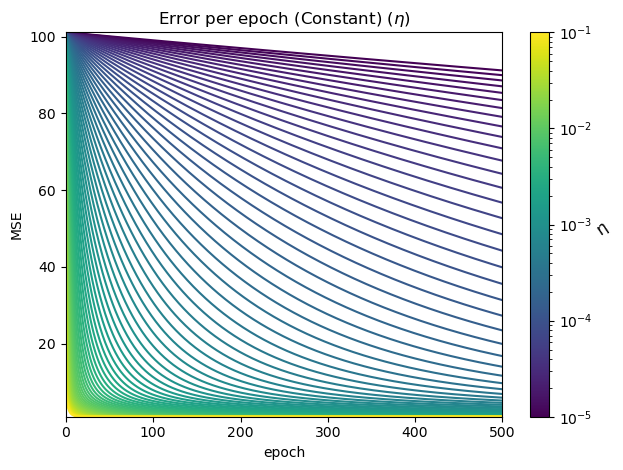

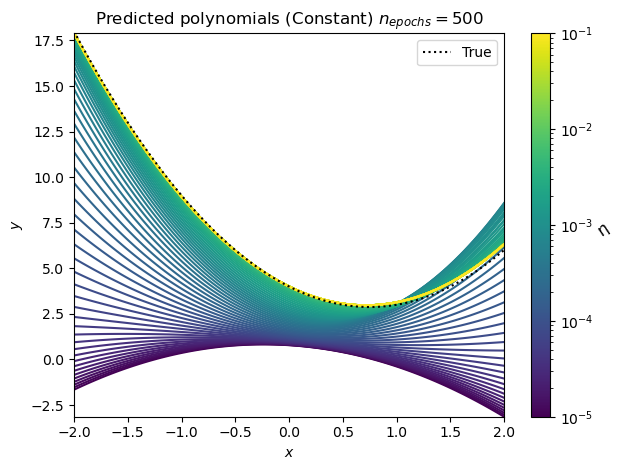

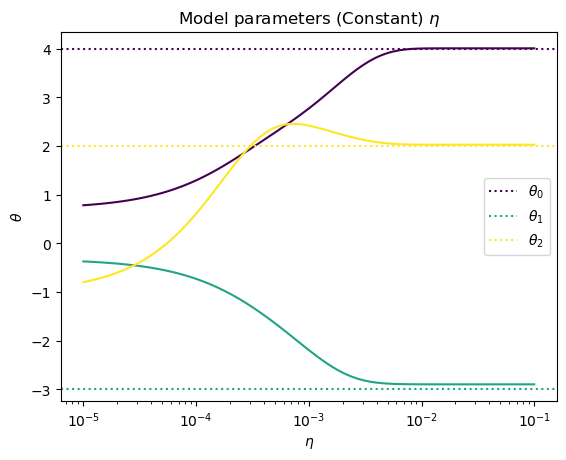

In [ ]:
eta_num = 75
eta_arr = jnp.logspace(-5, -1, eta_num)
GA.constant_analysis(eta_arr)

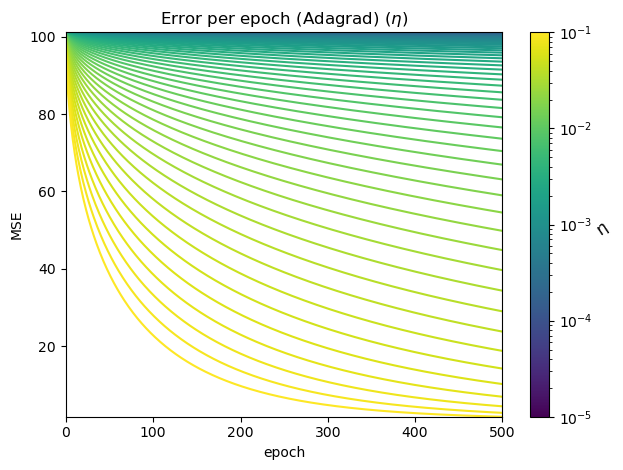

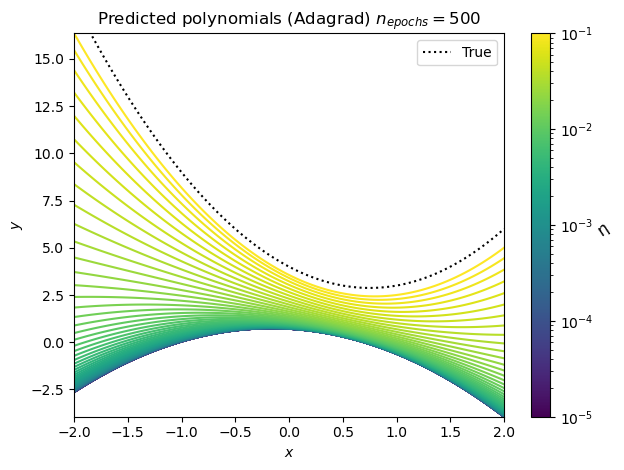

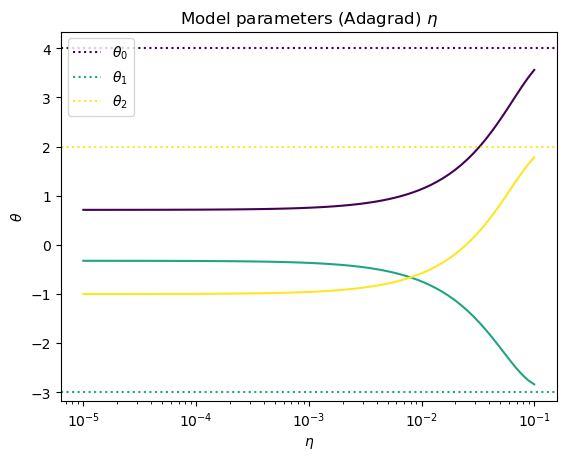

In [ ]:
import jax.numpy as np

eta_num = 75
eta_arr = np.logspace(-5, -1, eta_num)
GA.adagrad_analysis(eta_arr)